# 1 The objective of this notebook is to train and test a baseline model - Logistic Regression


We only want to focus on the dissatisfied clients, so we can identify the problems here. So, we will aim for the metric that cares about the negatives outcomes 0.
For this, we will focus on the specificity.

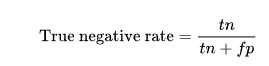


Reference metric: 73%

In [54]:
#---------Importing libraries---------#

#---Data analysis---#
import pandas as pd
import numpy as np


#---Data splitting---#
from sklearn.model_selection import train_test_split
#cross validation
from sklearn.model_selection import cross_val_score

#---classification models---#
from sklearn.linear_model import LogisticRegression

#---evaluation---#
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer


#---utils---#
import os


In [55]:
def specificity_score(y_test, y_pred):
    tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print('Specificity score: {:.2%} '.format(specificity))



# Create the custom scoring function
specificity_scorer = make_scorer(specificity_score)



## 1.1 Raw data

In [46]:
#importing raw data
df = pd.read_csv('data/ACME-HappinessSurvey2020.csv')

#splitting data into 80% train and 20% test
X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 46.15% 
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.41      0.64      0.50        11

    accuracy                           0.46        26
   macro avg       0.48      0.48      0.46        26
weighted avg       0.49      0.46      0.45        26



In [48]:
specificity_score(y_test, y_pred)

Specificity score: 33.33% 


Okay, our baseline is 46% accuracy. Let's see if we can do better.

## 1.2 Data version 1

In [49]:
#importing data
df_v1 = pd.read_csv('data/base_v1.csv')

#splitting data into 80% train and 20% test
X = df_v1.drop(columns=['Y'])
y = df_v1['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_v1.shape

(109, 7)

In [50]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 72.73% 
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.69      0.92      0.79        12

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71        22



72.7% ! almost a 30% improvement over the baseline. Let's see if we can do better with other models.

In [51]:
specificity_score(y_test, y_pred)

Specificity score: 50.00% 


In [52]:
#features importances

importance = LR.coef_[0]
# summarize feature importance
for col, values in zip(X.columns, importance):
    print('Feature: %s, Score: %.2f' % (col, values))


Feature: X1, Score: 0.43
Feature: X2, Score: -0.12
Feature: X3, Score: 0.23
Feature: X4, Score: -0.09
Feature: X5, Score: 0.07
Feature: X6, Score: 0.35


As expected, by the correlation map

1.2.1 Traning with cross validation

In [57]:
#traning with cross validation, k=5

LR = LogisticRegression(random_state=42)
scores = cross_val_score(LR, X, y, cv=5, scoring=specificity_scorer)



Specificity score: 50.00% 
Specificity score: 20.00% 
Specificity score: 60.00% 
Specificity score: 44.44% 
Specificity score: 11.11% 


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these paramete

## 1.3 Data version 2

In [ ]:
#importing data
df_v2 = pd.read_csv('data/base_v2.csv')

#splitting data into 80% train and 20% test
X = df_v2.drop(columns=['Y'])
y = df_v2['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_v2.shape

(109, 5)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 63.64% 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.67      0.67      0.67        12

    accuracy                           0.64        22
   macro avg       0.63      0.63      0.63        22
weighted avg       0.64      0.64      0.64        22



Okay, not good to try and remove features that are bad correlated with target. ( Why? )

## 1.3 Data version 3

In [ ]:
#importing data
df= pd.read_csv('data/base_v3.csv')

#splitting data into 80% train and 20% test
X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.shape

(109, 7)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 54.55% 
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.56      0.75      0.64        12

    accuracy                           0.55        22
   macro avg       0.53      0.53      0.51        22
weighted avg       0.53      0.55      0.52        22



## 1.4 Data version 4

In [ ]:
#importing data
df= pd.read_csv('data/base_v4.csv')

#splitting data into 80% train and 20% test
X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.shape

(109, 6)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 68.18% 
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.69      0.75      0.72        12

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22



## 1.5 Data version 5

In [ ]:
#importing data
df= pd.read_csv('data/base_v5.csv')

#splitting data into 80% train and 20% test
X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.shape

(109, 6)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

Base line Accuracy score: 68.18% 
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.83      0.74        12

    accuracy                           0.68        22
   macro avg       0.69      0.67      0.66        22
weighted avg       0.69      0.68      0.67        22



good try, but not good enough.

## 1.5 Data version 6

In [ ]:
dfs = []
for i in range(1,7):
    dfs.append(pd.read_csv('data/base_v6_X{}.csv'.format(i)))

In [ ]:
for df in dfs:
    #splitting data into 80% train and 20% test
    X = df.drop(columns=['Y'])
    y = df['Y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    LR = LogisticRegression(random_state=42)
    LR.fit(X_train, y_train)

    y_pred = LR.predict(X_test)

    print('Base line Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))

    print(classification_report(y_test, y_pred))

Base line Accuracy score: 63.64% 
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.62      0.83      0.71        12

    accuracy                           0.64        22
   macro avg       0.65      0.62      0.61        22
weighted avg       0.64      0.64      0.62        22

Base line Accuracy score: 68.18% 
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.69      0.75      0.72        12

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22

Base line Accuracy score: 68.18% 
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.83      0.74        12

    accuracy                           0.68        22
   macro avg       0.69   